In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math,copy
import pandas as pd

In [2]:
def compute_cost(X,y,w,b):
    cost=0
    m=X.shape[0]
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost+=(f_wb-y[i])**2
    cost/=(2*m)
    return cost

In [3]:
def compute_gradient(x,y,w,b):
    m,n=x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        f_wb=np.dot(w,x[i])+b
        err=f_wb-y[i]
        dj_db+=err
        for j in range(n):
            dj_dw[j]+=(err*x[i,j])
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db

In [4]:
def gradient_descent(x,y,w_in,b_in,cost_function,compute_gradient,alpha,num_iters):
    m=x.shape[0]
    J_history = []
    w_history = []    
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(num_iters):
        dj_jw,dj_db=compute_gradient(x,y,w,b)

        w=w-alpha*dj_jw
        b=b-alpha*dj_db
        if i<100000:      
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)        
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w, b, J_history, w_history 

In [5]:
def mean_score_normalization(X):
    normalized=(X-np.mean(X))/(np.max(X)-np.mean(X))
    return normalized

In [6]:
df=pd.read_csv("/Users/kamal/Documents/ml_final/linear_regression_dataset.csv")
#df.fillna(df.median(), inplace=True)

In [7]:
y_train=np.array(df.loc[:,'TOTCHG'])
x_train=np.array(df.drop('TOTCHG', axis="columns"))
m,n=x_train.shape
w_init=np.zeros(n)
b_init=0.0
al=1
num=3000

In [8]:
x_train_normalized=mean_score_normalization(x_train)
y_train_normalized=mean_score_normalization(y_train)

In [9]:
w, b, J_history, w_history=gradient_descent(x_train_normalized,y_train_normalized,w_init,b_init,compute_cost,compute_gradient,al,num)

Iteration    0: Cost     0.00   
Iteration  300: Cost     0.00   
Iteration  600: Cost     0.00   
Iteration  900: Cost     0.00   
Iteration 1200: Cost     0.00   
Iteration 1500: Cost     0.00   
Iteration 1800: Cost     0.00   
Iteration 2100: Cost     0.00   
Iteration 2400: Cost     0.00   
Iteration 2700: Cost     0.00   


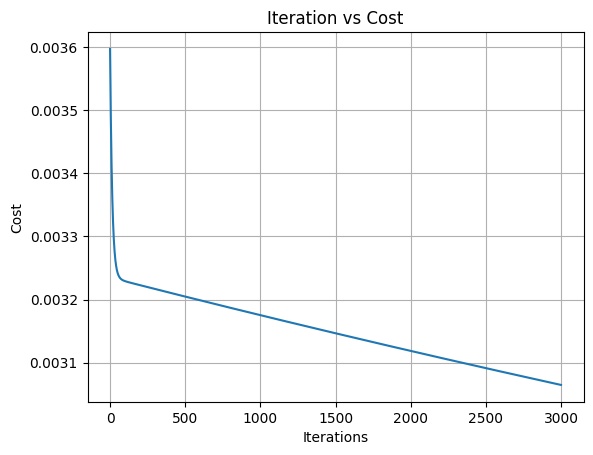

In [10]:
plt.plot(range(len(J_history)), J_history, label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Iteration vs Cost")
plt.grid(True)
plt.show()

In [11]:
# Function to calculate R-squared
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

# Function to calculate Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Predict values using the final weights and bias
y_pred = np.dot(x_train_normalized, w) + b

# Calculate R-squared and MSE
r2 = r_squared(y_train_normalized, y_pred)
mse = mean_squared_error(y_train_normalized, y_pred)

# Print the results
print(f"R-squared: {r2 * 100:.2f}%")
print(f"Mean Squared Error: {mse:.4f}")

R-squared: 15.48%
Mean Squared Error: 0.0061
